In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [88]:
data = pd.read_csv('youth_tobacco_survey_yts_data.csv')

In [90]:
data

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
9790,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
9791,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS12,12
9792,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,3GEN,8AGE,6RAC,1EDU,YTS12,12


In [92]:
data.head()

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5


In [94]:
data.dtypes

year                            int64
locationabbr                   object
locationdesc                   object
topictype                      object
topicdesc                      object
measuredesc                    object
datasource                     object
response                       object
data_value_unit                object
data_value_type                object
data_value                    float64
data_value_footnote_symbol     object
data_value_footnote            object
data_value_std_err            float64
low_confidence_limit          float64
high_confidence_limit         float64
sample_size                   float64
gender                         object
race                           object
age                            object
education                      object
geolocation                    object
topictypeid                    object
topicid                        object
measureid                      object
stratificationid1              object
stratificati

                    ---Yellow lines represent the NULL valaues( BY Graph)---

<Axes: >

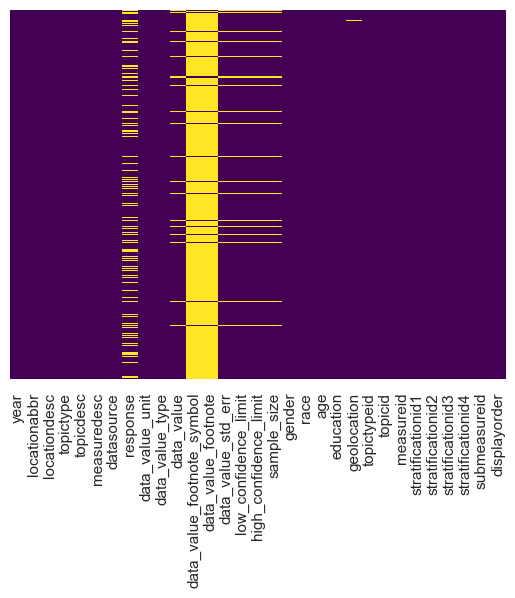

In [97]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False , cmap='viridis')

                                           ---#TO display the NULL values---

In [100]:
data.isnull().sum()

year                             0
locationabbr                     0
locationdesc                     0
topictype                        0
topicdesc                        0
measuredesc                      0
datasource                       0
response                      2246
data_value_unit                  0
data_value_type                  0
data_value                     425
data_value_footnote_symbol    9369
data_value_footnote           9369
data_value_std_err             425
low_confidence_limit           425
high_confidence_limit          425
sample_size                    425
gender                           0
race                             0
age                              0
education                        0
geolocation                      4
topictypeid                      0
topicid                          0
measureid                        0
stratificationid1                0
stratificationid2                0
stratificationid3                0
stratificationid4   

In [102]:
data.describe()

,year,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,sample_size,displayorder
count,9794.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9794.000000
mean,2006.261691,20.967830,1.874416,17.305892,24.638136,1504.883659,8.093527
std,4.902296,21.299902,1.765916,18.740968,24.079252,2261.157731,3.086392
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.200000,0.600000,1.900000,4.600000,668.000000,7.000000
50%,2006.000000,11.300000,1.300000,8.500000,14.100000,994.000000,9.000000
75%,2010.000000,39.100000,2.500000,31.600000,45.600000,1648.000000,11.000000
max,2015.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


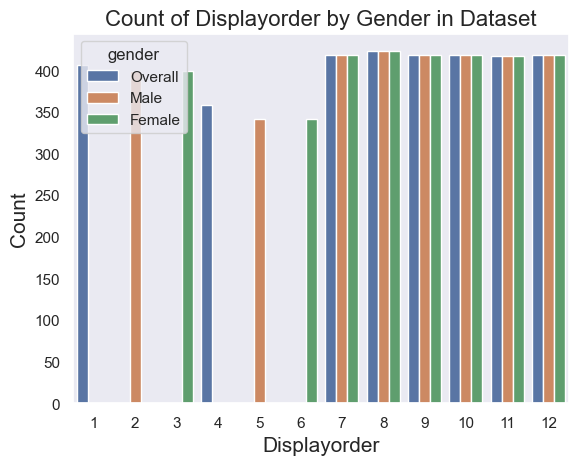

In [116]:
# Create a count plot to show the count of each gender
sns.countplot(
    data=data, x="displayorder",hue="gender"
)

# Adding labels and title
plt.xlabel('Displayorder', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Displayorder by Gender in Dataset', fontsize=16)

# Show the plot
plt.show()


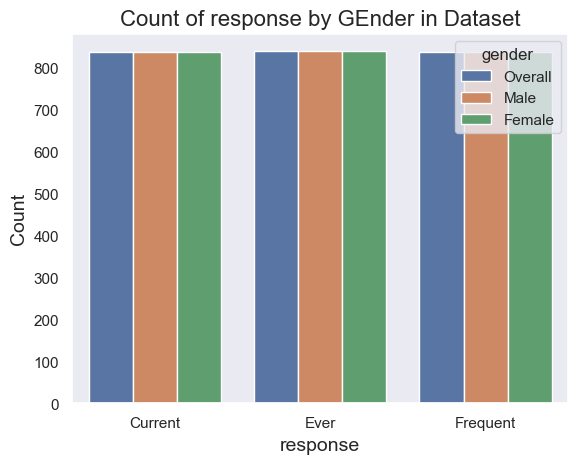

In [126]:
# Create a count plot to show the count of each gender
sns.countplot(
    data=data, x="response",hue="gender"
)

# Adding labels and title
plt.xlabel('response', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of response by GEnder in Dataset', fontsize=16)

# Show the plot
plt.show()


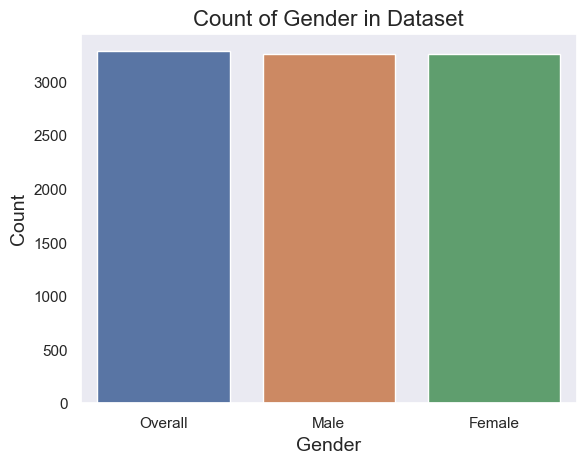

In [127]:
# Create a count plot to show the count of each gender
sns.countplot(
    data=data, x="gender",hue="gender"
)

# Adding labels and title
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Gender in Dataset', fontsize=16)

# Show the plot
plt.show()


In [129]:
data.drop(['data_value_footnote_symbol', 'data_value_footnote'], axis=1, inplace=True)

In [132]:
data.dropna(subset=['response'],inplace=True)

In [134]:
                                                 #To plot the graph for null values(show there is no NULL values)

<Axes: >

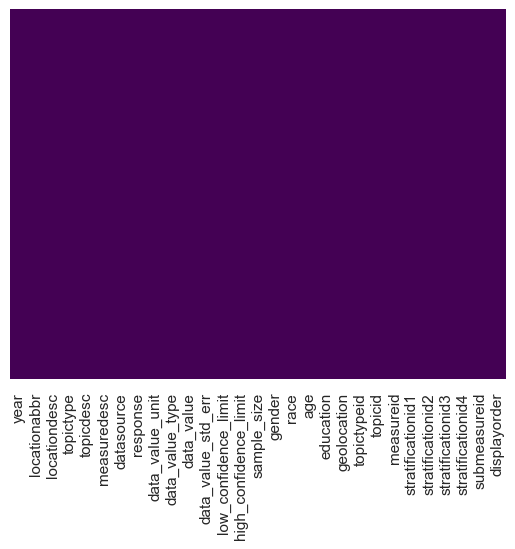

In [136]:
sns.heatmap(data.isnull(),yticklabels=False , cbar=False , cmap='viridis')

In [137]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [138]:
data['response'].unique()

array(['Current', 'Ever', 'Frequent'], dtype=object)

In [142]:
data['response']=data['response'].map({ 'Current':0,'Ever':1,'Frequent':2})

In [144]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['locationabbr'] = label_encoder.fit_transform(data['locationabbr'])
data['response'] = label_encoder.fit_transform(data['response'])


In [146]:
X = data[['gender', 'locationabbr', 'response']]
y = data['displayorder']

In [148]:
X

,gender,locationabbr,response
6,2,2,0
7,1,2,0
8,0,2,0
9,2,2,1
10,1,2,1
...,...,...,...
9789,2,40,2
9790,1,40,2
9791,1,40,2
9792,0,40,2


In [150]:
y

6        7
7        7
8        7
9        8
10       8
        ..
9789    12
9790    12
9791    12
9792    12
9793    12
Name: displayorder, Length: 7548, dtype: int64

                                           # Split the data into training and test sets

In [153]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


                                                     # Initialize and train the classifier

In [156]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

                                             # Make predictions


In [159]:
y_pred = classifier.predict(X_test)

In [163]:
                                      # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.37
Confusion Matrix:
 [[130   0   0 250   0   0]
 [  0 156   0   0 238   0]
 [  0   0 120   0   0 252]
 [209   0   0 163   0   0]
 [  0 247   0   0 133   0]
 [  0   0 222   0   0 145]]
Classification Report:
               precision    recall  f1-score   support

           7       0.38      0.34      0.36       380
           8       0.39      0.40      0.39       394
           9       0.35      0.32      0.34       372
          10       0.39      0.44      0.42       372
          11       0.36      0.35      0.35       380
          12       0.37      0.40      0.38       367

    accuracy                           0.37      2265
   macro avg       0.37      0.37      0.37      2265
weighted avg       0.37      0.37      0.37      2265

